# Understanding Over & Underfitting
## Predicting Boston Housing Prices

## Getting Started
In this project, you will use the Boston Housing Prices dataset to build several models to predict the prices of homes with particular qualities from the suburbs of Boston, MA.
We will build models with several different parameters, which will change the goodness of fit for each. 

---
## Data Exploration
Since we want to predict the value of houses, the **target variable**, `'MEDV'`, will be the variable we seek to predict.

### Import and explore the data. Clean the data for outliers and missing values. 

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor


In [2]:
boston = load_boston()

/Users/eazevedo/opt/anaconda3/envs/project2/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include th

In [9]:
print(boston['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

### Next, we want to explore the data. Pick several varibables you think will be ost correlated with the prices of homes in Boston, and create plots that show the data dispersion as well as the regression line of best fit.

In [5]:
X = pd.DataFrame(boston['data'], columns = boston['feature_names'])
y = pd.DataFrame(boston['target'], columns = ['labels'])
display(X.head())
display(y.head())      

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


,labels
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


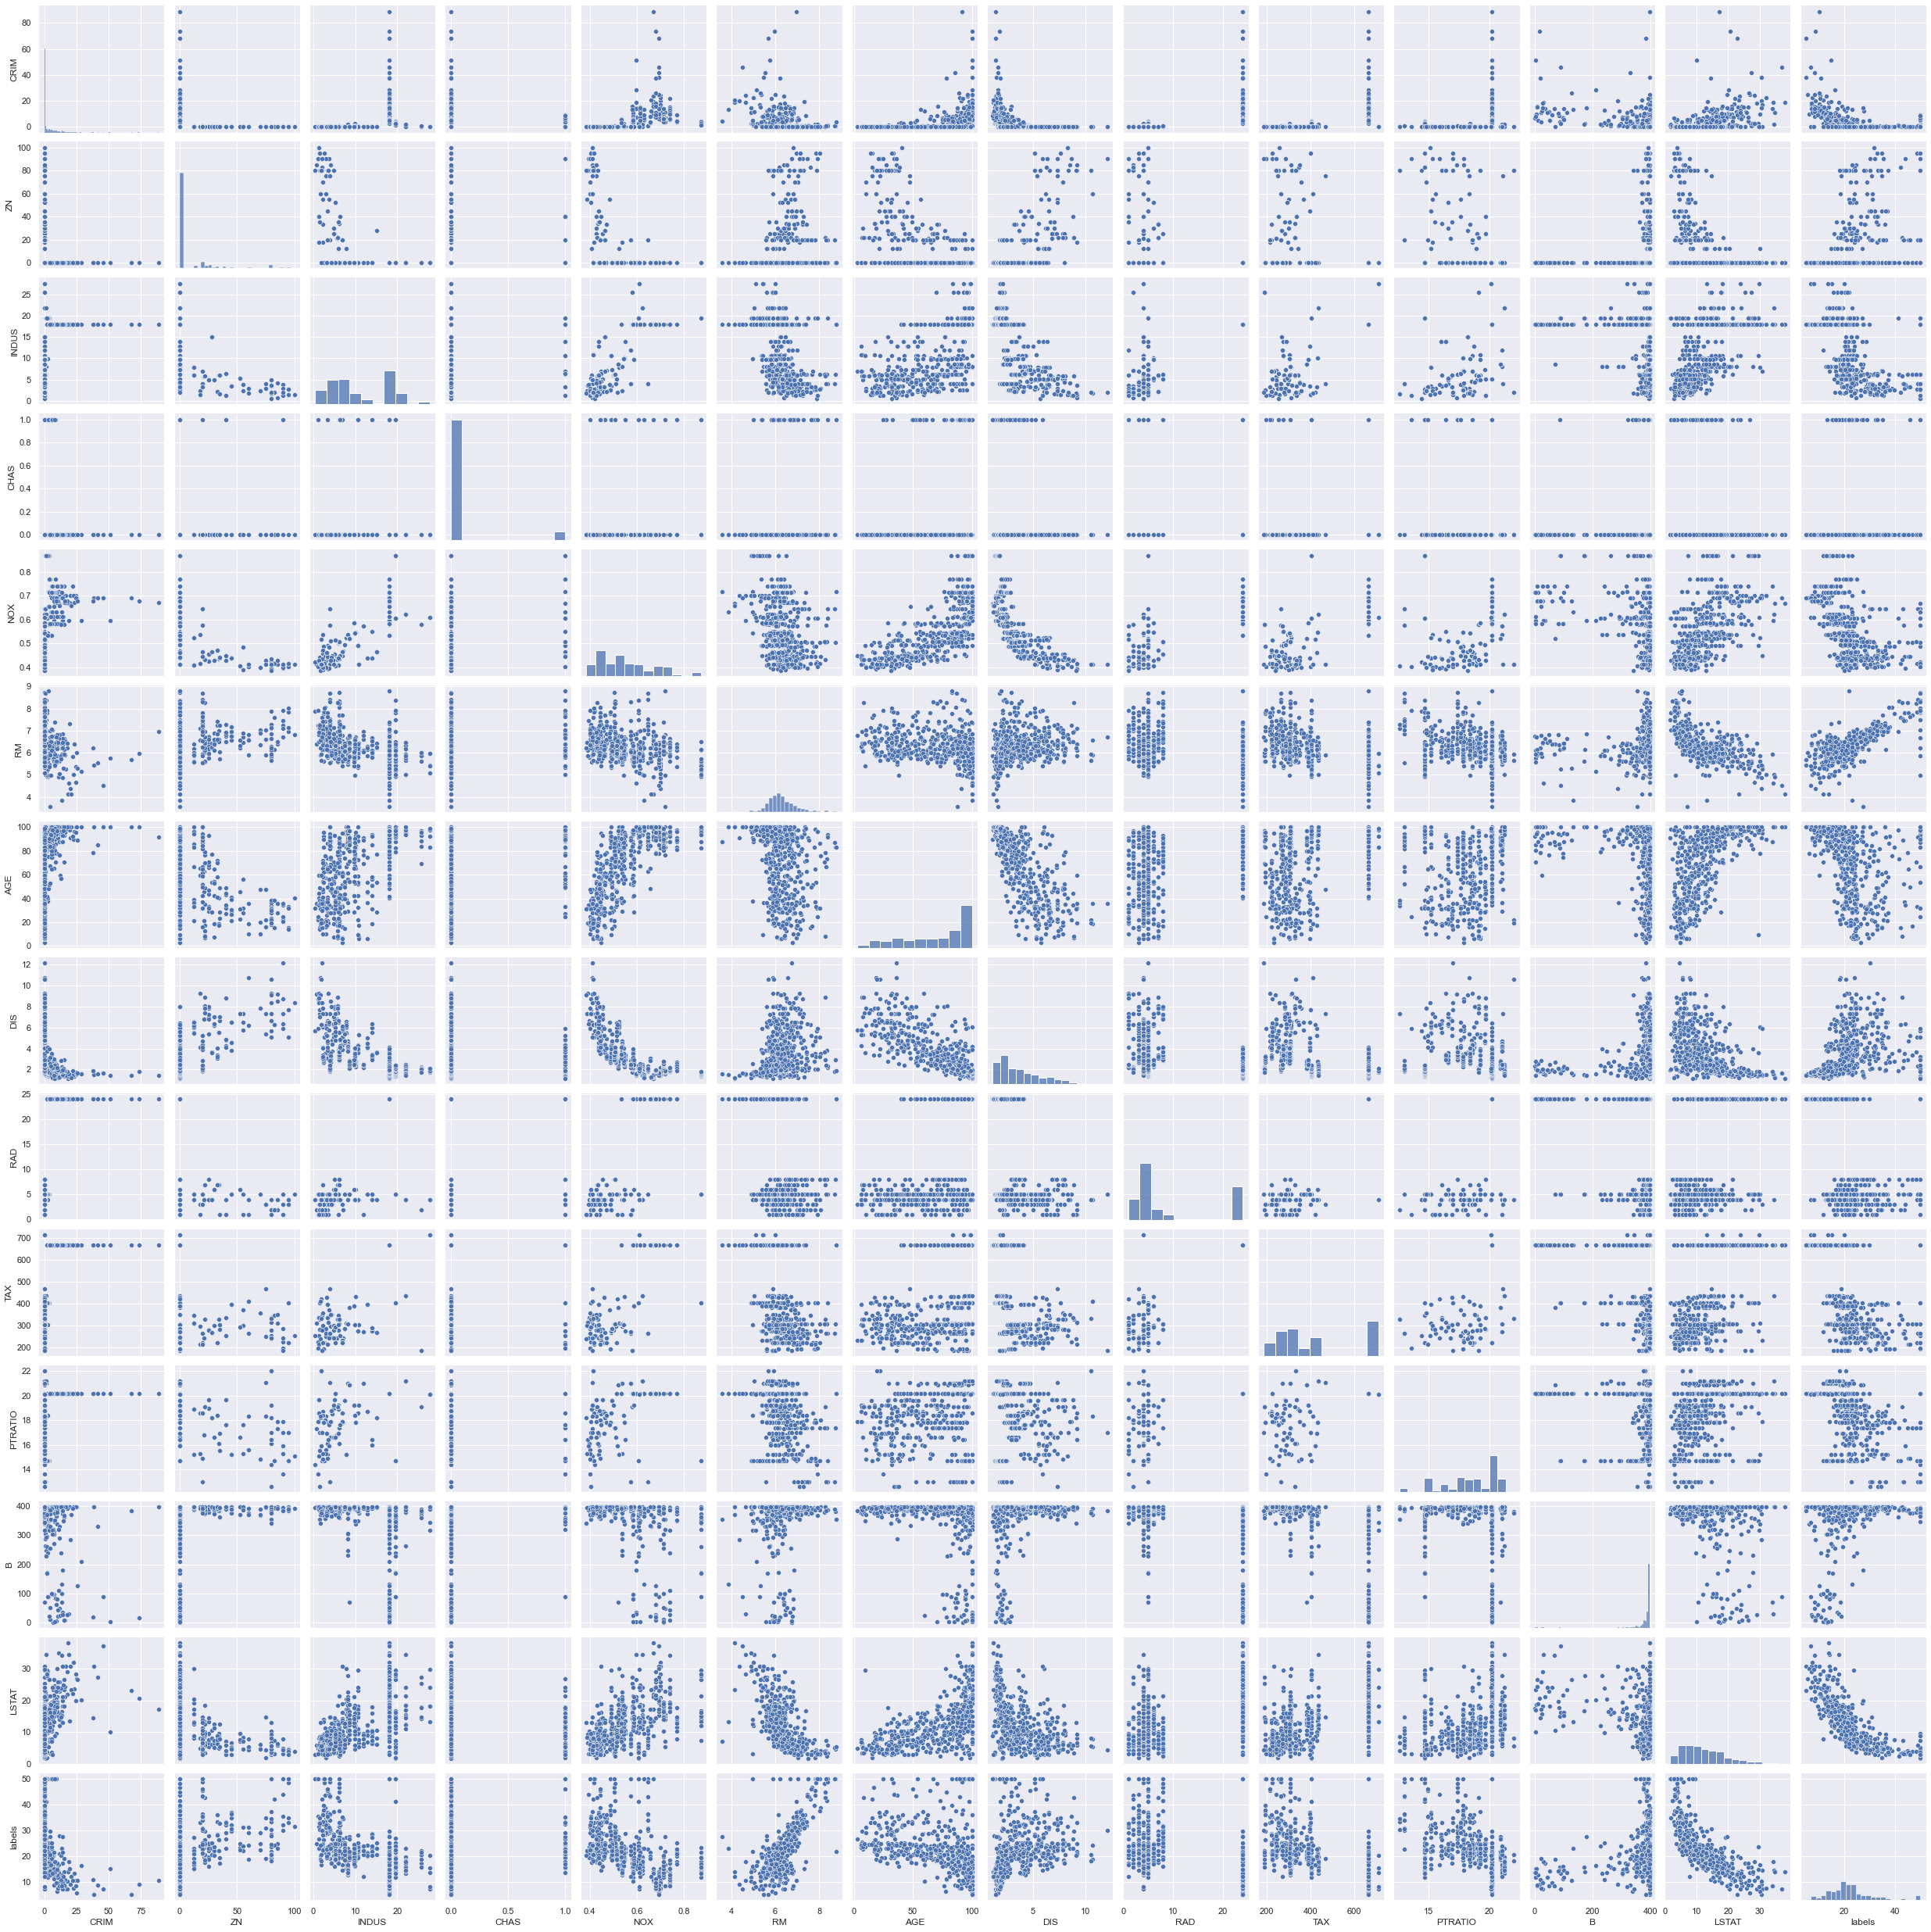

In [26]:
pairplot_boston = pd.concat([X, y], axis = 1)
sns.pairplot(pairplot_boston)
plt.show()

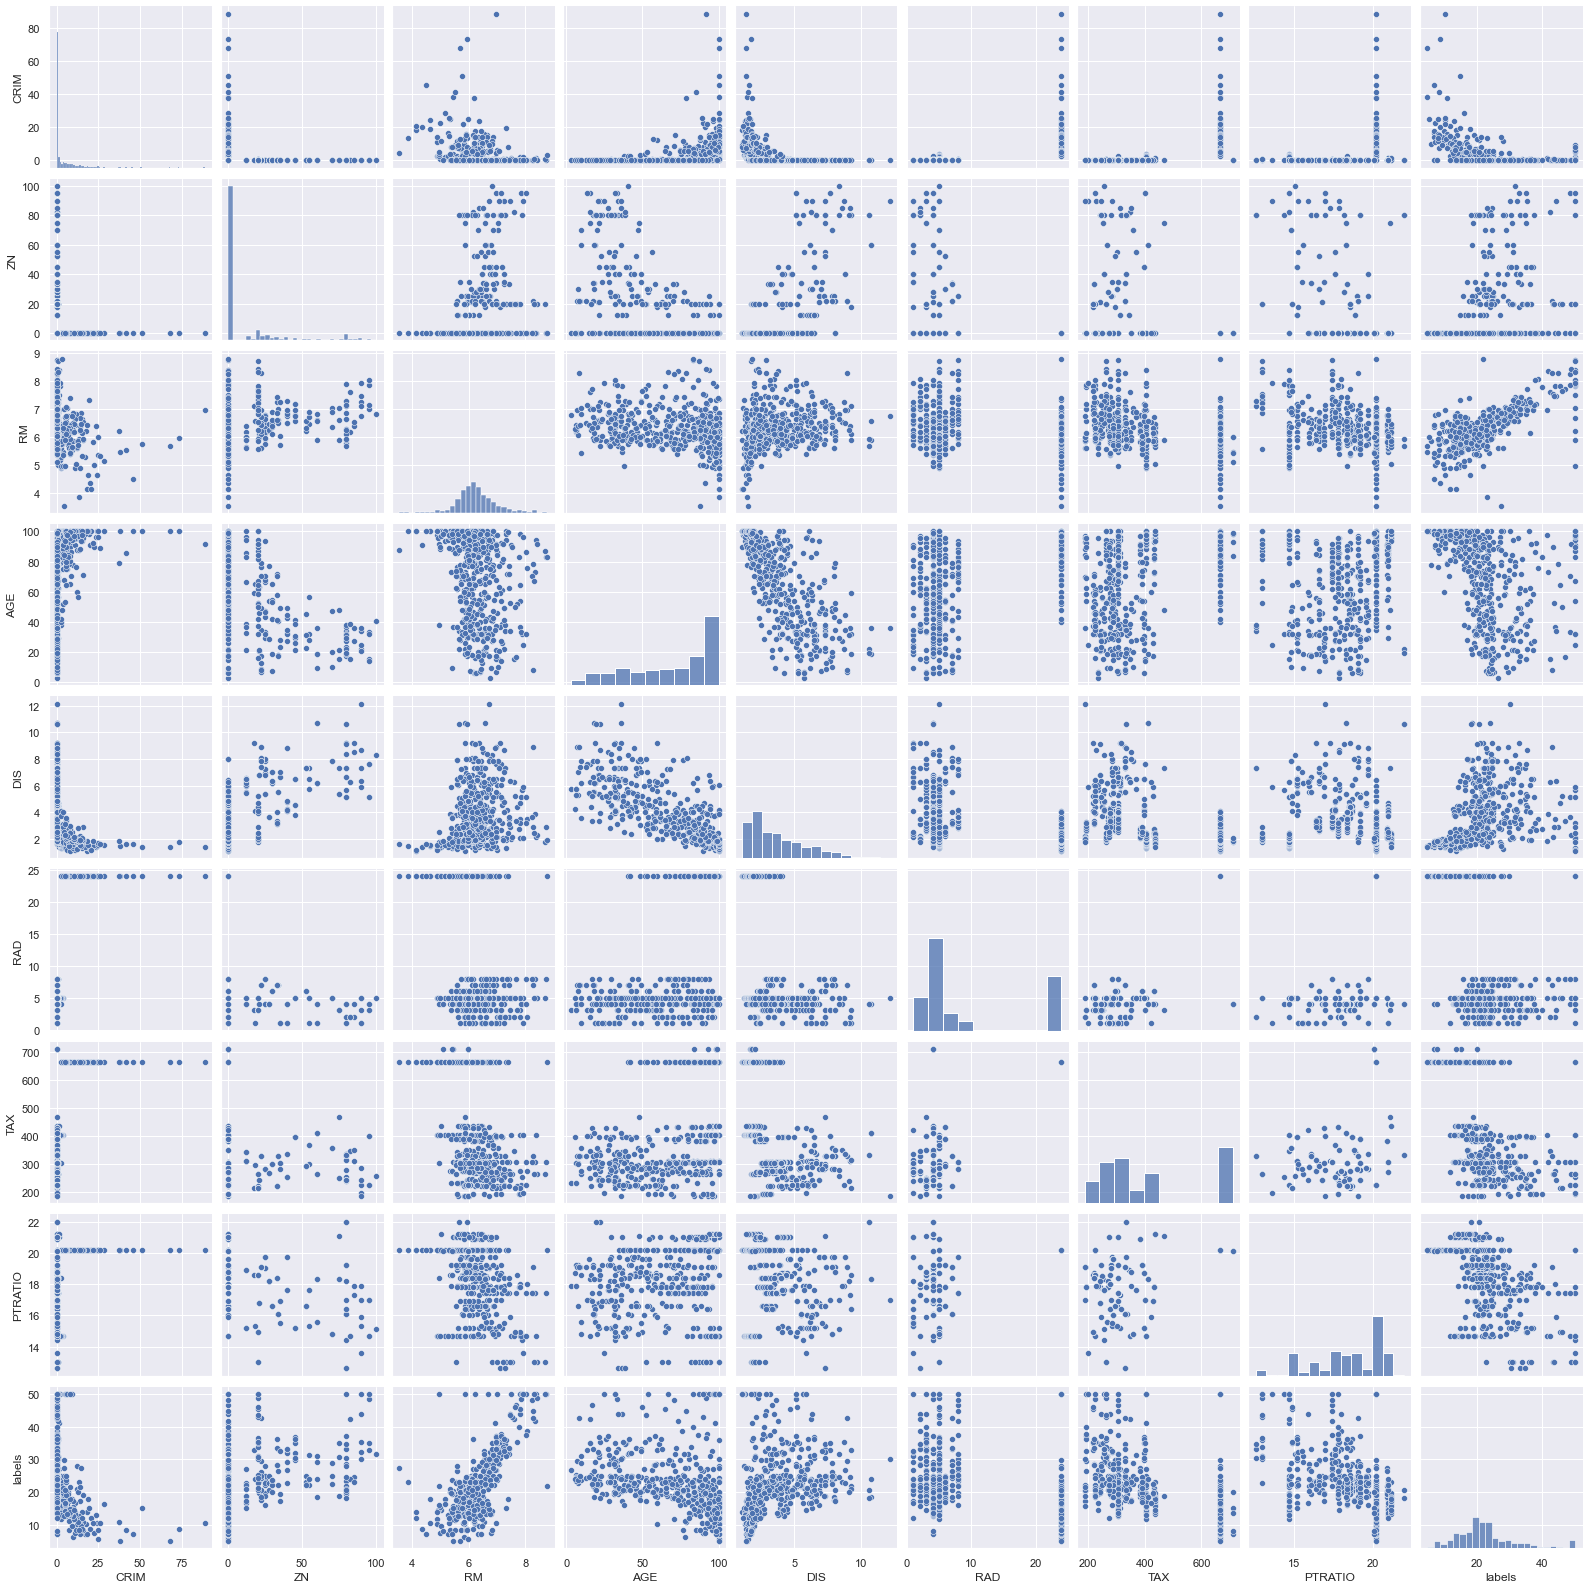

In [27]:
pairplot_boston2 = pairplot_boston.drop(['INDUS', 'CHAS', 'NOX', 'B','LSTAT'], axis = 1)
sns.pairplot(pairplot_boston2)
plt.show()

### What do these plots tell you about the relationships between these variables and the prices of homes in Boston? Are these the relationships you expected to see in these variables?

The higher the house price the lower the crime rate.
There's a linear correlation or number of rooms and house price; so bigger houses are more expensive.
Older houses seem to be bigger, which obviously means more expensive. And younger construction tends to be smaller.
So age is not correlated to house price as one would expect: the newer the more expensive.


### Make a heatmap of the remaining variables. Are there any variables that you did not consider that have very high correlations? What are they?

In [19]:
X.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

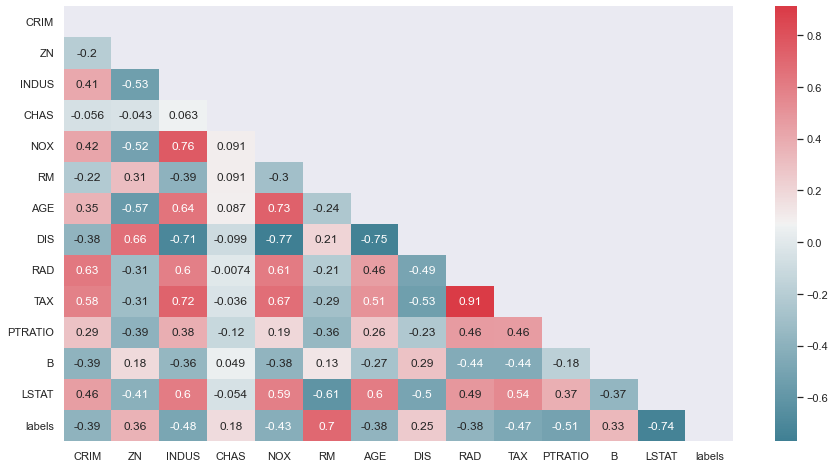

In [25]:
boston_heat = pd.concat([X, y], axis = 1)

corr = boston_heat.corr()
sns.set(rc = {'figure.figsize':(15,8)})
matrix = np.triu(corr)
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, cbar=True, annot=True, mask=matrix, cmap=cmap)
plt.show()

Yes, the LSTAT (the lower status of the population) and the negative correlation it has with house princing. 

### Calculate Statistics
Calculate descriptive statistics for housing price. Include the minimum, maximum, mean, median, and standard deviation. 

In [29]:
y.describe()

,labels
count,506.000000
mean,22.532806
std,9.197104
min,5.000000
25%,17.025000
50%,21.200000
75%,25.000000
max,50.000000


----

## Developing a Model

### Implementation: Define a Performance Metric
What is the performance meteric with which you will determine the performance of your model? Create a function that calculates this performance metric, and then returns the score. 

In [32]:
from sklearn.metrics import r2_score

def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    return r2_score(y_true, y_predict)

### Implementation: Shuffle and Split Data
Split the data into the testing and training datasets. Shuffle the data as well to remove any bias in selecting the traing and test. 

In [33]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state = 2)

----

## Analyzing Model Performance
Next, we are going to build a Random Forest Regressor, and test its performance with several different parameter settings.

### Learning Curves
Lets build the different models. Set the max_depth parameter to 2, 4, 6, 8, and 10 respectively. 

In [39]:
depths = [2, 4, 6, 8, 10]

train_scores = []
test_scores = []

for d in depths:
    
    rfr = RandomForestRegressor(max_depth=d)
    rfr.fit(X_train, y_train)

    y_pred_test = rfr.predict(X_test)
    y_pred_train = rfr.predict(X_train)
    
    test_score = performance_metric(y_test, y_pred_test)
    train_score = performance_metric(y_train, y_pred_train)
    
    display(test_score)
    display(train_score)

/var/folders/x3/nrtw1rrd2wx8z7zn70vb11gr0000gn/T/ipykernel_85537/1099108755.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfr.fit(X_train, y_train)


0.7971010435607693

0.7585663783838039

/var/folders/x3/nrtw1rrd2wx8z7zn70vb11gr0000gn/T/ipykernel_85537/1099108755.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfr.fit(X_train, y_train)


0.8717056604192512

0.9154025280000337

/var/folders/x3/nrtw1rrd2wx8z7zn70vb11gr0000gn/T/ipykernel_85537/1099108755.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfr.fit(X_train, y_train)


0.8781419309664829

0.9563235027777471

/var/folders/x3/nrtw1rrd2wx8z7zn70vb11gr0000gn/T/ipykernel_85537/1099108755.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfr.fit(X_train, y_train)


0.8936675596429999

0.9731962838683472

/var/folders/x3/nrtw1rrd2wx8z7zn70vb11gr0000gn/T/ipykernel_85537/1099108755.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfr.fit(X_train, y_train)


0.8895610852099387

0.9807920514796525

Now, plot the score for each tree on the training set and on the testing set.

What do these results tell you about the effect of the depth of the trees on the performance of the model?

The bigger the depth the bigger overfitting of the model.

### Bias-Variance Tradeoff
When the model is trained with a maximum depth of 1, does the model suffer from high bias or from high variance? How about when the model is trained with a maximum depth of 10? Check out this article before answering: https://towardsdatascience.com/understanding-the-bias-variance-tradeoff-165e6942b229

With max depth of 1 I think the model will suffer from high bias and tend to oversimplify which leads to underfitting and with max depth of 10 I think the model will suffer from high variance and will be unable to generalize when exposed to new data which means it will overfit.

### Best-Guess Optimal Model
What is the max_depth parameter that you think would optimize the model? Run your model and explain its performance.

/var/folders/x3/nrtw1rrd2wx8z7zn70vb11gr0000gn/T/ipykernel_85537/344983149.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)
/var/folders/x3/nrtw1rrd2wx8z7zn70vb11gr0000gn/T/ipykernel_85537/344983149.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)
/var/folders/x3/nrtw1rrd2wx8z7zn70vb11gr0000gn/T/ipykernel_85537/344983149.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)
/var/folders/x3/nrtw1rrd2wx8z7zn70vb11gr0000gn/T/ipykernel_85537/344983149.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samp

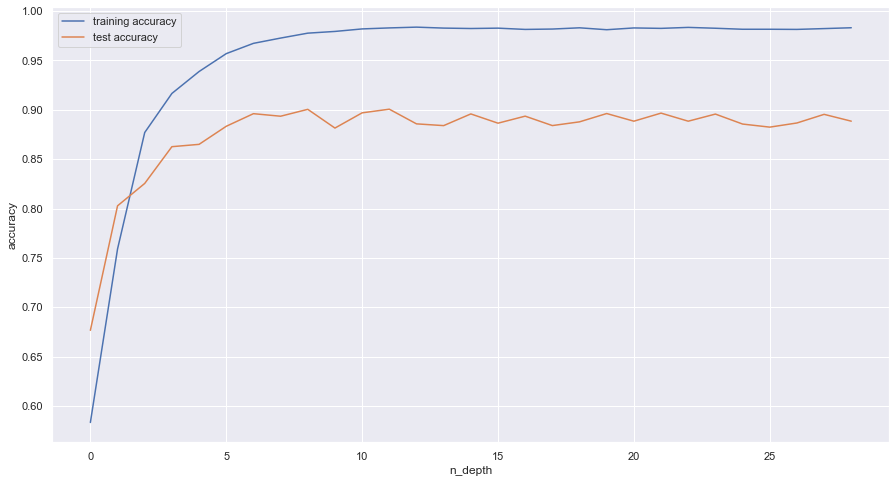

In [43]:
max_depth = range(1, 30)

test_acc = []
train_acc = []

for depth in max_depth:
    model = RandomForestRegressor(max_depth = depth)
    model.fit(X_train, y_train)
    train_acc.append(model.score(X_train, y_train))
    test_acc.append(model.score(X_test, y_test))

plt.plot(train_acc, label = 'training accuracy')
plt.plot(test_acc, label = 'test accuracy')
plt.ylabel('accuracy')
plt.xlabel('n_depth')
plt.legend()
plt.show()

Best max_depth will probably be 7 or 8.

### Applicability
*In a few sentences, discuss whether the constructed model should or should not be used in a real-world setting.*  
**Hint:** Some questions to answering:
- *How relevant today is data that was collected from 1978?*
- *Are the features present in the data sufficient to describe a home?*
- *Is the model robust enough to make consistent predictions?*
- *Would data collected in an urban city like Boston be applicable in a rural city?*

Historical data is always relevant, but probably it would be more useful to add some more recent data and new features.
It would be logical to add features like outdoor facilities (parks, gardens, etc.), the proximity to schools or of commerce (stores, coffeeshops, supermarkets, etc.), sustainability and energetic efficiency of the house and public transportation available.
Some of the features should be excluded from the dataset, since they are discriminatory (B and LSTAT).
I don't think the model is good enough to make consistent predictions.
In my opinion, no. The data collected in an urban setting will not be applicable in a rural environment.
